In [9]:
import sys
sys.path.append("../../")

In [10]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from datetime import timedelta
from tqdm.auto import tqdm
from stockpy.neural_network import MLP
from util.StockDataset import StockDataset, StockDatasetSequence
from torch.utils.data import DataLoader

In [11]:
# set style of graphs
plt.style.use('ggplot')
from pylab import rcParams
plt.rcParams['figure.dpi'] = 100

In [12]:
df = pd.read_csv('../../stock/AAPL.csv', parse_dates=True, index_col='Date').dropna(how="any")
X_train, X_test = train_test_split(df, test_size=0.1, shuffle=False)

In [13]:
predictor = MLP()
predictor.fit(X_train, batch_size=8, epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

In [14]:
y_pred = predictor.predict(X_test)

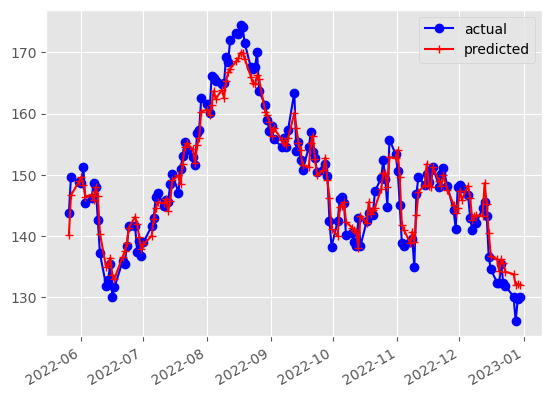

In [15]:
y_test = (X_test['Close']).values 
days = np.array(X_test.index, dtype="datetime64[ms]")
            
fig = plt.figure()
            
axes = fig.add_subplot(111)
axes.plot(days, y_test, 'bo-', label="actual") 
axes.plot(days, y_pred, 'r+-', label="predicted")
            
fig.autofmt_xdate()
            
plt.legend()
plt.show()